<a href="https://colab.research.google.com/github/Muele93/Ndifunc/blob/master/Xente_Fraud_Detection(upsampling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**




In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


**Loading data**

In [0]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
var = pd.read_csv('Xente_Variable_Definitions.csv')

In [3]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
train.shape

(95662, 16)

In [0]:
test.shape

(45019, 15)

In [0]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [0]:
test.shape

(45019, 15)

In [0]:
var

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [0]:
fraud_count = train['FraudResult'].value_counts()

In [5]:
fraud_count

0    95469
1      193
Name: FraudResult, dtype: int64

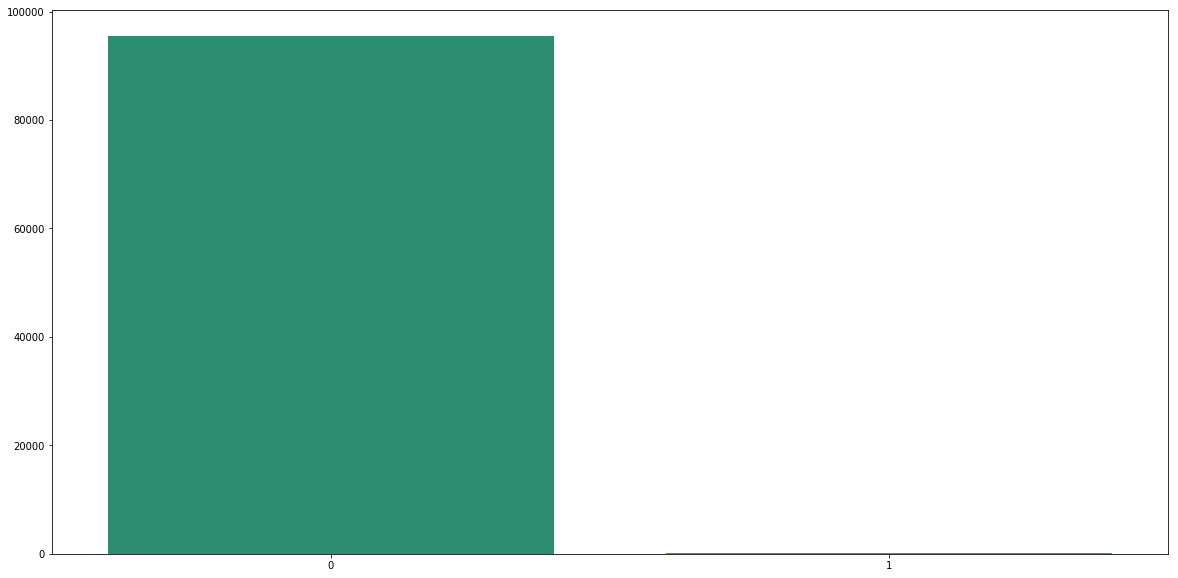

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(fraud_count.index,fraud_count.values,palette="Dark2")


plt.show()

In [0]:
train_trial= train.copy() 

In [0]:
test_trial = test.copy()

In [0]:
train_trial.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


**Resampling data**

In [0]:
from sklearn.utils import resample

In [0]:
x_train = train_trial.drop(['FraudResult'], axis=1)
y_train = pd.DataFrame(train_trial['FraudResult'])


In [10]:
x_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [10]:
y_train.head()

,FraudResult
0,0
1,0
2,0
3,0
4,0


In [0]:
No_fraud = train_trial[train_trial.FraudResult==0]
fraud = train_trial[train_trial.FraudResult==1]

In [78]:

fraud.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:04:51Z,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15T08:20:09Z,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:31:57Z,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T09:15:23Z,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T11:49:46Z,0,1


In [0]:
#upsampling 
upsample_fraud = resample(fraud,replace=True,n_samples=len(No_fraud),random_state=27) 


In [80]:
upsample_fraud.shape

(95469, 16)

In [0]:
new_upsample= pd.concat([No_fraud, upsample_fraud])

In [82]:
new_upsample.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [83]:
new_upsample.FraudResult.value_counts()

1    95469
0    95469
Name: FraudResult, dtype: int64

In [84]:
new_upsample.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [85]:
test.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [41]:
new_upsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190938 entries, 0 to 37681
Data columns (total 16 columns):
TransactionId           190938 non-null object
BatchId                 190938 non-null object
AccountId               190938 non-null object
SubscriptionId          190938 non-null object
CustomerId              190938 non-null object
CurrencyCode            190938 non-null object
CountryCode             190938 non-null int64
ProviderId              190938 non-null object
ProductId               190938 non-null object
ProductCategory         190938 non-null object
ChannelId               190938 non-null object
Amount                  190938 non-null float64
Value                   190938 non-null int64
TransactionStartTime    190938 non-null object
PricingStrategy         190938 non-null int64
FraudResult             190938 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 24.8+ MB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
TransactionId           45019 non-null object
BatchId                 45019 non-null object
AccountId               45019 non-null object
SubscriptionId          45019 non-null object
CustomerId              45019 non-null object
CurrencyCode            45019 non-null object
CountryCode             45019 non-null int64
ProviderId              45019 non-null object
ProductId               45019 non-null object
ProductCategory         45019 non-null object
ChannelId               45019 non-null object
Amount                  45019 non-null float64
Value                   45019 non-null int64
TransactionStartTime    45019 non-null object
PricingStrategy         45019 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.2+ MB


In [0]:
new_sample.shape

(190938, 16)

In [43]:
var

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [0]:
new_sample_1 = new_upsample.drop(['AccountId','BatchId','SubscriptionId','CustomerId','TransactionStartTime'],axis=1)

In [87]:
new_sample_1.head()

,TransactionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,TransactionId_76871,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0
1,TransactionId_73770,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0
2,TransactionId_26203,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0
3,TransactionId_380,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0
4,TransactionId_28195,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0


In [0]:
test_trial = test_trial.drop(['AccountId','BatchId','SubscriptionId','CustomerId','TransactionStartTime'],axis=1)

In [0]:
new_sample_cat = [x for x in new_sample_1.columns if new_sample_1.dtypes[x] == 'object']
new_sample_num = [x for x in new_sample_1.columns if new_sample_1.dtypes[x] !='object']
test_cat = [x for x in new_test.columns if new_test.dtypes[x] == 'object']
test_num = [x for x in new_test.columns if new_test.dtypes[x] !='object']

In [24]:
new_sample_cat

['TransactionId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime']

In [25]:
test_cat

['TransactionId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime']

**Label encoding non-numerical data**

In [0]:
 
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
  

new_sample_1['TransactionId']= label_encoder.fit_transform(new_sample_1['TransactionId'])
new_sample_1['CurrencyCode']= label_encoder.fit_transform(new_sample_1['CurrencyCode'])
new_sample_1['ProviderId']= label_encoder.fit_transform(new_sample_1['ProviderId'])
new_sample_1['ProductId']= label_encoder.fit_transform(new_sample_1['ProductId'])
new_sample_1['ProductCategory']= label_encoder.fit_transform(new_sample_1['ProductCategory'])
new_sample_1['ChannelId']= label_encoder.fit_transform(new_sample_1['ChannelId'])
#new_sample_1['TransactionStartTime']= label_encoder.fit_transform(new_sample_1['TransactionStartTime'])

test_trial['TransactionId']= label_encoder.fit_transform(test_trial['TransactionId'])
test_trial['CurrencyCode']= label_encoder.fit_transform(test_trial['CurrencyCode'])
test_trial['ProviderId']= label_encoder.fit_transform(test_trial['ProviderId'])
test_trial['ProductId']= label_encoder.fit_transform(test_trial['ProductId'])
test_trial['ProductCategory']= label_encoder.fit_transform(test_trial['ProductCategory'])
test_trial['ChannelId']= label_encoder.fit_transform(test_trial['ChannelId'])
#test_trial['TransactionStartTime']= label_encoder.fit_transform(test_trial['TransactionStartTime'])




In [90]:
test_trial.head()

,TransactionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy
0,27503,0,256,4,19,0,2,1000.0,1000,4
1,43295,0,256,4,5,2,2,2000.0,2000,2
2,26351,0,256,3,22,2,1,-50.0,50,2
3,19533,0,256,4,1,0,2,3000.0,3000,4
4,17346,0,256,3,22,2,1,-60.0,60,2


In [91]:
new_sample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190938 entries, 0 to 37681
Data columns (total 11 columns):
TransactionId      190938 non-null int64
CurrencyCode       190938 non-null int64
CountryCode        190938 non-null int64
ProviderId         190938 non-null int64
ProductId          190938 non-null int64
ProductCategory    190938 non-null int64
ChannelId          190938 non-null int64
Amount             190938 non-null float64
Value              190938 non-null int64
PricingStrategy    190938 non-null int64
FraudResult        190938 non-null int64
dtypes: float64(1), int64(10)
memory usage: 17.5 MB


In [92]:
test_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 10 columns):
TransactionId      45019 non-null int64
CurrencyCode       45019 non-null int64
CountryCode        45019 non-null int64
ProviderId         45019 non-null int64
ProductId          45019 non-null int64
ProductCategory    45019 non-null int64
ChannelId          45019 non-null int64
Amount             45019 non-null float64
Value              45019 non-null int64
PricingStrategy    45019 non-null int64
dtypes: float64(1), int64(9)
memory usage: 3.4 MB


**Modelling**

In [0]:
new_x_train =new_sample_1.drop('FraudResult',axis=1)
new_y_train = new_sample_1['FraudResult']
X_test_ = test_trial


In [94]:
X_test_.head()

,TransactionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy
0,27503,0,256,4,19,0,2,1000.0,1000,4
1,43295,0,256,4,5,2,2,2000.0,2000,2
2,26351,0,256,3,22,2,1,-50.0,50,2
3,19533,0,256,4,1,0,2,3000.0,3000,4
4,17346,0,256,3,22,2,1,-60.0,60,2


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_x_train,new_y_train, test_size = 0.2, random_state=42)

In [96]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Logistic regression**

In [0]:
log_reg = LogisticRegression()

In [98]:
log_reg.fit(new_x_train, new_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
X_test_.shape

(45019, 10)

In [0]:
Y_pred = log_reg.predict(X_test_)

In [101]:
Y_pred.shape

(45019,)

In [102]:
log_reg.score(new_x_train,new_y_train)

0.9648053294786789

In [0]:
 from sklearn.metrics import f1_score

In [0]:
#F1 = f1_score(Y_test, Y_pred, average=None)

In [0]:
print(F1)

[0.99913646 0.35294118]


In [104]:
test_trial.shape

(45019, 10)

In [105]:
Y_pred.shape

(45019,)

In [0]:
df = pd.DataFrame({'TransactionId':test.TransactionId,'FraudResult':Y_pred})
df.to_csv('submission_2.csv',index =False)

In [107]:
X_test_.head()

,TransactionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy
0,27503,0,256,4,19,0,2,1000.0,1000,4
1,43295,0,256,4,5,2,2,2000.0,2000,2
2,26351,0,256,3,22,2,1,-50.0,50,2
3,19533,0,256,4,1,0,2,3000.0,3000,4
4,17346,0,256,3,22,2,1,-60.0,60,2


In [108]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(new_x_train, new_y_train)

Y_pred_forest = random_forest.predict(X_test_)

random_forest.score(new_x_train,new_y_train)

1.0

In [0]:
df = pd.DataFrame({'TransactionId':test.TransactionId,'FraudResult':Y_pred_forest})
df.to_csv('submission_5.csv',index =False)